# Data Description & Exploratory Data Analysis

First, we will load the dataset.

In [1]:
library(tidyverse)
library(dplyr)

library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
raw_dataset <- read_csv("restaurant_revenue.csv")

head(raw_dataset)
nrow(raw_dataset)

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Cuisine_Type
dbl (7): Number_of_Customers, Menu_Price, Marketing_Spend, Average_Customer_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,45,350.9120
24,40.02008,4.577892,Italian,17.95256,0,36,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,91,326.5298
70,43.00531,4.416053,Italian,18.98410,1,59,348.1906
30,17.45620,3.475052,Italian,12.76614,1,30,185.0091
92,19.42767,13.114473,American,43.09995,1,10,399.8675


[1] 1000

## 1. Data Description

The dataset is [Restaurants Revenue Prediction](https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction)<sup>[1]</sup>, consisting of 8 features and 1000 **simulated** observations for various fictitious restaurants. The dataset was designed for educational use, with the specific goal of predicting monthly revenue in mind. Unfortunately, no units are given for any of the features.

The table below contains the type (continuous or categorical) and a brief interpretation of each feature.

| feature                     | categorical? | description |
| --------------------------- | ------------ | ----------- |
| `Number_Of_Customers`       |   | Number of customers visiting the restaurant. |
| `Menu_Price`                |   | Average menu price at the restaurant. |
| `Marketing_Spend`           |   | Expenditure on marketing activities. |
| `Cuisine_Type`              | ✔ | Type of cuisine (Italian, Mexican, Japanese, American). |
| `Average_Customer_Spending` |   | Average spending per customer. |
| `Promotions`                | ✔ | Whether promotions were conducted (binary, 0 or 1). |
| `Reviews`                   |   | Number of reviews received by the restaurant. |
| `Monthly_Revenue`           |   | Monthly revenue (intended response variable by design). |

<sub>[1]: MrSimple07. (2024). Restaurants Revenue Prediction [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/7420974</sub>

## 2. Question

We recognize that the dataset was designed for the intended purpose of predicting monthly revenue. Hence, the research question will be:

> *Which factors (number of customers, menu price, etc...) are the most important for predicting monthly revenue?*

This question is primarily focused on inference. Our methodology will most likely involve performing hypothesis tests to discover relationships between variables, though we may still utilize prediction as a way to gauge correlation and evaluate the performance of our models.

# 3. Exploratory Data Analysis and Visualization

We will wrangle and visualize the dataset.

In [3]:
# Convert categorical features into factor data types.
dataset <- raw_dataset |>
    mutate(Cuisine_Type = as_factor(Cuisine_Type), Promotions = as_factor(Promotions))

head(dataset)

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,45,350.9120
24,40.02008,4.577892,Italian,17.95256,0,36,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,91,326.5298
70,43.00531,4.416053,Italian,18.98410,1,59,348.1906
30,17.45620,3.475052,Italian,12.76614,1,30,185.0091
92,19.42767,13.114473,American,43.09995,1,10,399.8675


In [4]:
# Check for missing or suspicious values---looks good!
summary(dataset)

stopifnot(sum(map_df(dataset, is.null)) + sum(map_df(dataset, is.na)) == 0)

 Number_of_Customers   Menu_Price    Marketing_Spend       Cuisine_Type
 Min.   :10.00       Min.   :10.01   Min.   : 0.003768   Japanese:262  
 1st Qu.:30.00       1st Qu.:20.40   1st Qu.: 4.690724   Italian :232  
 Median :54.00       Median :30.86   Median :10.092047   American:256  
 Mean   :53.27       Mean   :30.22   Mean   : 9.958726   Mexican :250  
 3rd Qu.:74.00       3rd Qu.:39.84   3rd Qu.:14.992436                 
 Max.   :99.00       Max.   :49.97   Max.   :19.994276                 
 Average_Customer_Spending Promotions    Reviews      Monthly_Revenue 
 Min.   :10.04             0:503      Min.   : 0.00   Min.   :-28.98  
 1st Qu.:19.60             1:497      1st Qu.:24.00   1st Qu.:197.10  
 Median :29.25                        Median :50.00   Median :270.21  
 Mean   :29.48                        Mean   :49.84   Mean   :268.72  
 3rd Qu.:39.55                        3rd Qu.:76.00   3rd Qu.:343.40  
 Max.   :49.90                        Max.   :99.00   Max.   :563.38  

Considering the rationale behind this dataset, it is not surprising that there is very little wrangling needed to tidy the data. It is essentially in an ideal state---there are no missing values or outliers, and it is already in wide format.

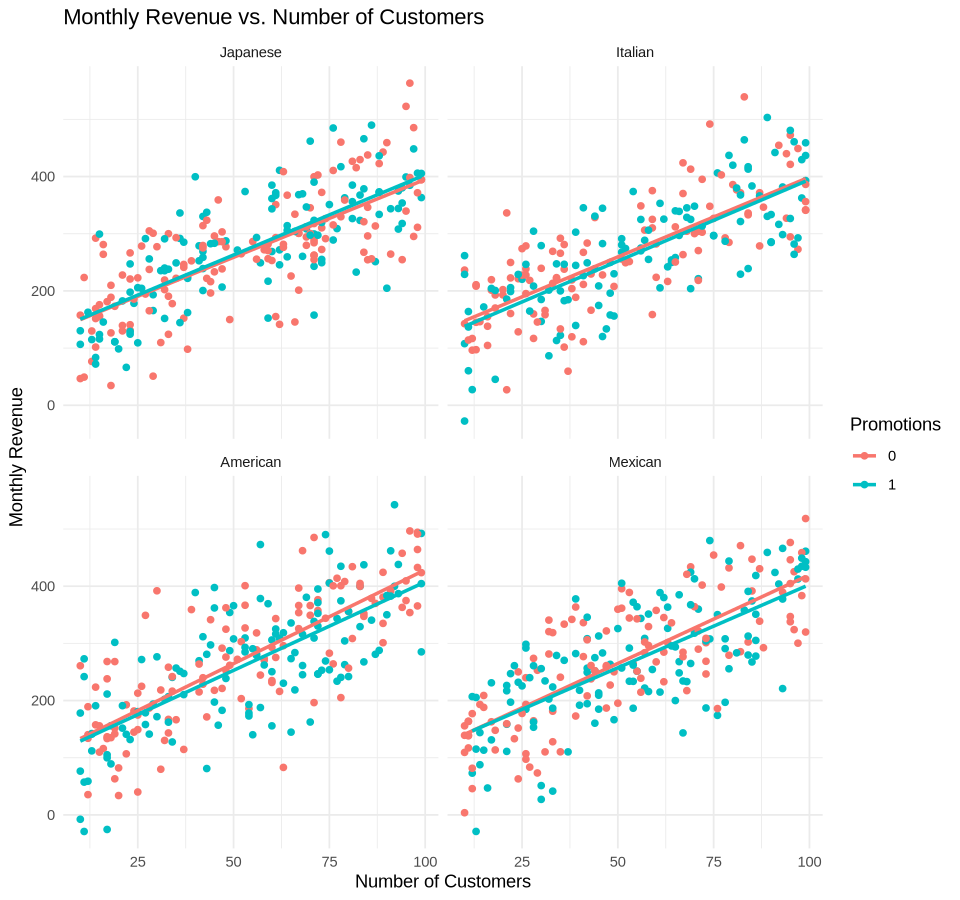

In [5]:
options(repr.plot.width = 8, repr.plot.height = 7.5)

dataset |> 
    ggplot(aes(x = Number_of_Customers, y = Monthly_Revenue, color = Promotions)) +
    geom_point() +
    geom_smooth(method = lm, formula = y ~ x, se = FALSE) +
    facet_wrap(~ Cuisine_Type) +
    labs(title = "Monthly Revenue vs. Number of Customers", x = "Number of Customers", y = "Monthly Revenue", color = "Promotions") + theme_minimal()

The figure above is a scatterplot of monthly revenue by number of customers, faceted on the cuisine type, and coloured by whether the restaurant ran promotions or not. Intuitively, we suspect that the number of customers will be one of the strongest predictors of monthly revenue, which is why we chose it as the continuous explanatory variable in our visualization.

Based on the scatterplot, there indeed appears to be a positive correlation between the number of customers and monthly revenue. Additionally, we can see that the impact of cuisine type and promotions is not particularly pronounced. Furthermore, we observe that the data is reasonably homoscedastic with respect to the variables shown.

Unfortunately, a single scatterplot is not practical for more than two numerical variables at once. In practice, we would have used a pair-plot to identify more potential relationships or issues with multicollinearity---though in a simulated dataset such as this one, we might expect each feature to be independent.